# Lab 01, Experiment - 3
(Just run the Run All Command, all output will be again reappeared)

# Below is the python code for mt2pcm and pcm2mt ---- Part (a)

Concept: The program takes the "value" from mt (one by one) and divide it by the quantization nterval length to get 
the "interval number" in which the "value" belongs. And the code is assigned based on the interval number with zero 
padded in before the code if value is greater than zero or 1 if it's smaller than zero. The function mt2pcm is returning 
the new quantized mt and the code array for the same.

In [11]:
%matplotlib inline

In [12]:
# File: pcmfun.py
# Functions for conversion between m(t) and PCM representation 
# Concept: The program takes the "value" from mt (one by one) and divide it by the quantization
# interval length to get the "interval number" in which the "value" belongs. And the code is assigned
# based on the interval number with zero padded in before the code if value is greater than zero or
# 1 if it's smaller than zero. The function mt2pcm is returning the new quantized mt and the code array for the same.

from pylab import *
import numpy as np

def mt2pcm(mt, bits=3):
    """
    Message signal m(t) to binary PCM conversion
    >>> dn = mt2pcm(mt,bits) <<<<
    where mt	normalised (A+1) "analog" message signal
        bits	number of bits used per sample
        dn	binary output sequence in sign-magnitude
            form, MSB (first)
    """
    
    qlevel = np.power(2,bits)   # number of quantization level
    bits=bits-1      # number of bits is reduced by one to incorporate the sign of number
   
    if abs(min(mt)) > abs(max(mt)):     # defining the delta in uniform fashion
        delta = 2*abs(min(mt))/qlevel
    else:
        delta = 2*abs(max(mt))/qlevel

        pow = np.power(2.0,1+arange(-bits,0))    # making array of increasing negative power of 2
    code_array = array([])        # initialisation of code_array
    mt_new_quantized = array([])
    for val in mt:              # starting the loop to check each values in mt
        if val > 0:
            x = floor(val/delta)
            if x == val/delta:     # if val is equal maximum quantization level, it's reduced by 1 to encode it
                x = x-1
            mt_new_quantized = np.append(mt_new_quantized,array([x*delta+0.5*delta]))   # making of new quantized mt
            x_bin = array(mod(floor(outer(array([x]),pow)),2),int)
            code_array = np.append(code_array,hstack((array([[0]]),x_bin)))  # making of code array
        elif val < 0:
            x = floor(abs(val)/delta)
            if x == abs(val)/delta:       # if val is equal maximum quantization level, it's reduced by 1 to encode it
                x = x-1
            mt_new_quantized = np.append(mt_new_quantized,array([-x*delta-0.5*delta]))     ## making of new quantized mt
            x_bin = array(mod(floor(outer(array([x]),pow)),2),int)
            code_array = np.append(code_array,hstack((array([[1]]),x_bin)))  # making of code array
        else:
            mt_new_quantized = np.append(mt_new_quantized,array([0]))     ## making of new quantized mt
            x_bin = array(mod(floor(outer(array([0]),pow)),2),int)
            code_array = np.append(code_array,hstack((array([[0]]),x_bin)))  # making of code array
            
    return  mt_new_quantized, array(code_array,int8)
            
    
    
# Same concept is applied here but in reverse way as applied in mt2pcm 
    
def pcm2mt(dn, bits=3):
    """
    Binary PCM to message signal m(t) conversion
    >>>>> mt = pcm2mt(dn, bits) <<<<<
    where   dn binary output sequence in sign-magnitude form, MSB (sign) first
            bits   number of bits used per sample
            mt  normalized (A=1) "analog" message signal
    """

    dn = array(dn,int)
    mt=array([])
    delta = 2/np.power(2,bits)
    bits=bits-1
    pow = np.power(2.0,arange(bits,0,-1)-1)    # making array of increasing power of 2
    for n in arange(0,int(len(dn)/(bits+1))):
        intvl_number = inner(dn[n*(bits+1)+1:(n+1)*(bits+1)],pow)    # this is the same the interval used in the mt2pcm
        if dn[n*(bits+1)] == 0:
            if intvl_number == np.power(2,bits):
                intvl_number = intvl_number - 1
            mt = np.append(mt, array([intvl_number*delta + 0.5*delta]))   # making the quantized signal
        else:
            if intvl_number == np.power(2,bits):
                intvl_number = intvl_number - 1
            mt = np.append(mt, array([-intvl_number*delta - 0.5*delta]))   # making the quantized signal
        
    return mt

# Below is the input which is given in the Lab Assignment
# fm = 100 Hz, fs = 4000 Hz and bits = 3

In [13]:
fs=4000
fm=100
bits=3
tt=arange(0,2*pi*fs)/fs
mt=sin(2*pi*fm*tt)

In [14]:
# Running the Code for the above inputs
mt_quantized,dn = mt2pcm(mt,bits=3)

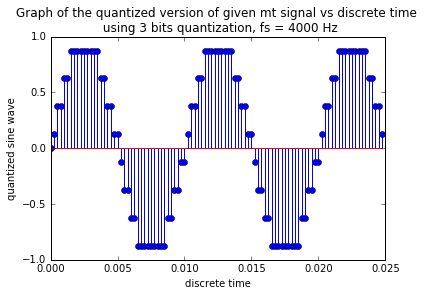

In [15]:
stem(tt[0:100],mt_quantized[0:100])
xlabel('discrete time')
ylabel('quantized sine wave')
title('Graph of the quantized version of given mt signal vs discrete time \n using %s bits quantization, fs = %s Hz' %(bits,fs))
show()

# Recovering the signal from bits sequence with the above input

In [16]:
st = pcm2mt(dn,bits=3)        # dn is the output of the mt2pcm signal

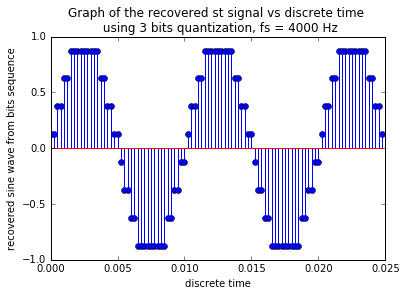

In [17]:
stem(tt[0:100],st[0:100])
xlabel('discrete time')
ylabel('recovered sine wave from bits sequence')
title('Graph of the recovered st signal vs discrete time \n using %s bits quantization, fs = %s Hz' %(bits,fs))
show()

# Below is the graph for given data, fm = 100 Hz, fs = 4000 Hz and bits = 8


In [18]:
fs=4000
fm=100
bits=8
tt=arange(0,2*pi*fs)/fs
mt=sin(2*pi*fm*tt)

In [19]:
# Running the Code for the above inputs
mt_quantized,dn = mt2pcm(mt,bits=8)

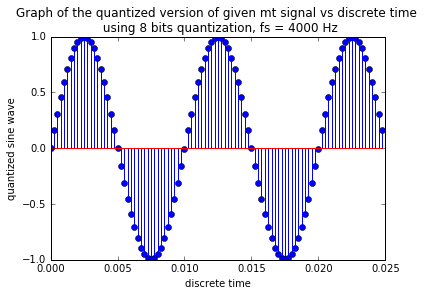

In [20]:
stem(tt[0:100],mt_quantized[0:100])
xlabel('discrete time')
ylabel('quantized sine wave')
title('Graph of the quantized version of given mt signal vs discrete time \n using %s bits quantization, fs = %s Hz' %(bits,fs))
show()

# Recovering the signal from bits sequence with the above input

In [21]:
st = pcm2mt(dn,bits=8)                              # dn is the output of the mt2pcm signal

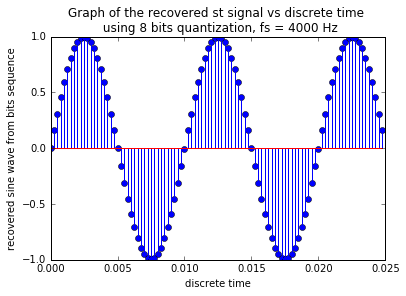

In [22]:
stem(tt[0:100],st[0:100])
xlabel('discrete time')
ylabel('recovered sine wave from bits sequence')
title('Graph of the recovered st signal vs discrete time \n using %s bits quantization, fs = %s Hz' %(bits,fs))
show()

# Below is the graph for given data, fm = 100 Hz, fs = 8000 Hz and bits = 3


In [23]:
# Given Data
fs=8000            
fm=100
bits=3
tt=arange(0,2*pi*fs)/fs
mt=sin(2*pi*fm*tt)

In [24]:
# Running the Code for the above inputs
mt_quantized,dn = mt2pcm(mt,bits=3)

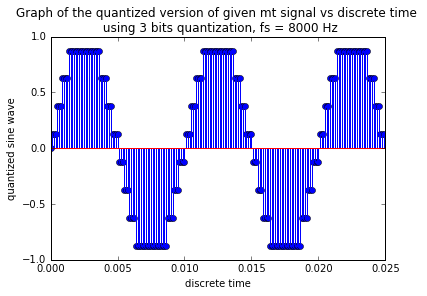

In [25]:
stem(tt[0:200],mt_quantized[0:200])
xlabel('discrete time')
ylabel('quantized sine wave')
title('Graph of the quantized version of given mt signal vs discrete time \n using %s bits quantization, fs = %s Hz' %(bits,fs))
show()

# Recovering the signal from bits sequence with the above input

In [26]:
st = pcm2mt(dn,bits=3)     # dn is the output of the mt2pcm signal

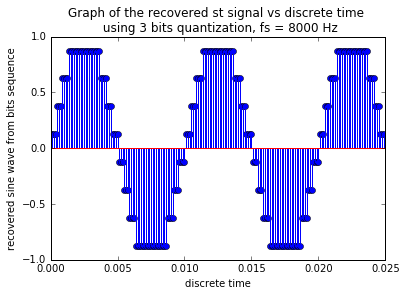

In [27]:
stem(tt[0:200],st[0:200])
xlabel('discrete time')
ylabel('recovered sine wave from bits sequence')
title('Graph of the recovered st signal vs discrete time \n using %s bits quantization, fs = %s Hz' %(bits,fs))
show()

# Below is the graph for given data, fm = 100 Hz, fs = 8000 Hz and bits = 8


In [28]:
fs=8000
fm=100
bits=8
tt=arange(0,2*pi*fs)/fs
mt=sin(2*pi*fm*tt)

In [29]:
# Running the Code for the above inputs
mt_quantized,dn = mt2pcm(mt,bits=8)

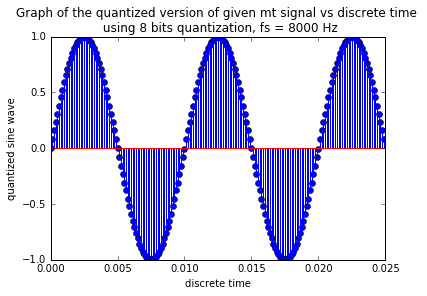

In [30]:
stem(tt[0:200],mt_quantized[0:200])
xlabel('discrete time')
ylabel('quantized sine wave')
title('Graph of the quantized version of given mt signal vs discrete time \n using %s bits quantization, fs = %s Hz' %(bits,fs))
show()

# Recovering the signal from bits sequence with the above input

In [31]:
st = pcm2mt(dn,bits=8)     # dn is the output of the mt2pcm signal

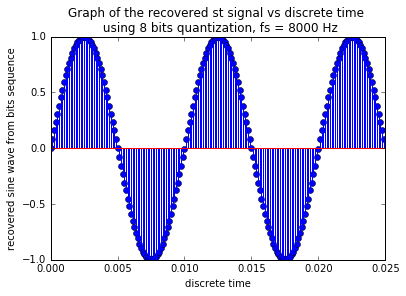

In [32]:
stem(tt[0:200],st[0:200])
xlabel('discrete time')
ylabel('recovered sine wave from bits sequence')
title('Graph of the recovered st signal vs discrete time \n using %s bits quantization, fs = %s Hz' %(bits,fs))
show()

# In the above question, we developed code for pcm to mt conversion and vice-versa. We verified the code using sampled sine wave with sampling frequency fs = 4000 Hz, 8000 Hz using 3-bits and 8-bits quantization. We observed that as we increase the quantization levels, the recovery of graph is better.

# Part (b)

# First, we will try to recover the message signal in pcm_test01.wav and pcm_test02.wav file.

 # Below is the code which will chnage the pcm_test01.wav to to bits sequence. The bit rate taken is 24000.

In [48]:
# %load ftpam_rcvr01.py
# File: ftpam_rcvr01.py
# Script file that accepts a binary unipolar flat top PAM
# signal r(t) with bitrate fb and sampling rate fs
# as input and decodes it into a received text string.
# The PAM signal r(t) is received from a wav-file with
# sampling rate fs. First r(t) is sampled at the right DT sequence 
# sampling times, spaced tb = 1/fb apart. The result is then 
# quantized to binary (0 or 1) to form the 
# estimated received sequence dnhat which is subsequently
# converted to 8 bit ASCII text.

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("pcm_test01.wav")

fb = 24000 
tb = 1/float(fb)

bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits

rt = list(rt)  	# changing rt into list type
comp_val = (max(rt) + min(rt))/2.0 	# taking mid value for estimation

######### getting sample of rt signal #######


######### getting sample of rt signal #######
offset = floor(tb/2*fs)
dnhat = [0]*n # Initializing the array to zeros
for i in arange(n):
    sp = int(offset+2+i*fs*tb)
    dnhat[i] = int(rt[sp]>0.0)

#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array



# Now the bit sequence is changed to message signal.

In [49]:
mt = pcm2mt(dnhat, bits=3)

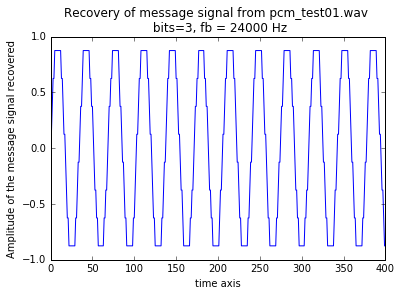

In [50]:
plot(mt[0:400])
xlabel('time axis')
ylabel('Amplitude of the message signal recovered')
title('Recovery of message signal from pcm_test01.wav \n bits=3, fb = 24000 Hz')

 # Below is the code which will chnage the pcm_test02.wav to to bits sequence. The bit rate taken is 64000.

In [51]:
# %load ftpam_rcvr01.py
# File: ftpam_rcvr01.py
# Script file that accepts a binary unipolar flat top PAM
# signal r(t) with bitrate fb and sampling rate fs
# as input and decodes it into a received text string.
# The PAM signal r(t) is received from a wav-file with
# sampling rate fs. First r(t) is sampled at the right DT sequence 
# sampling times, spaced tb = 1/fb apart. The result is then 
# quantized to binary (0 or 1) to form the 
# estimated received sequence dnhat which is subsequently
# converted to 8 bit ASCII text.

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("pcm_test02.wav")

fb = 64000 
tb = 1/float(fb)

bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits

rt = list(rt)  	# changing rt into list type
comp_val = (max(rt) + min(rt))/2.0 	# taking mid value for estimation

######### getting sample of rt signal #######


######### getting sample of rt signal #######
offset = floor(tb/2*fs)
dnhat = [0]*n # Initializing the array to zeros
for i in arange(n):
    sp = int(offset+2+i*fs*tb)
    dnhat[i] = int(rt[sp]>0.0)

#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array



In [52]:
mt = pcm2mt(dnhat, bits=8)

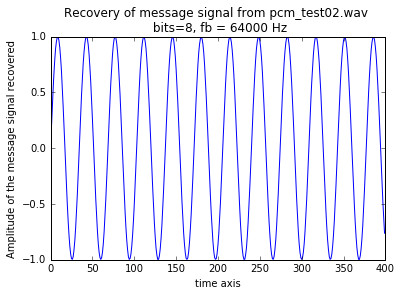

In [53]:
plot(mt[0:400])
xlabel('time axis')
ylabel('Amplitude of the message signal recovered')
title('Recovery of message signal from pcm_test02.wav \n bits=8, fb = 64000 Hz')

 # Below is the code which will chnage the pcm_sig01.wav to to bits sequence. The bit rate taken is 64000.

In [82]:
# %load ftpam_rcvr01.py
# File: ftpam_rcvr01.py
# Script file that accepts a binary unipolar flat top PAM
# signal r(t) with bitrate fb and sampling rate fs
# as input and decodes it into a received text string.
# The PAM signal r(t) is received from a wav-file with
# sampling rate fs. First r(t) is sampled at the right DT sequence 
# sampling times, spaced tb = 1/fb apart. The result is then 
# quantized to binary (0 or 1) to form the 
# estimated received sequence dnhat which is subsequently
# converted to 8 bit ASCII text.

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("pcm_sig01.wav")

fb = 64000 
tb = 1/float(fb)

bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits

rt = list(rt)  	# changing rt into list type
comp_val = (max(rt) + min(rt))/2.0 	# taking mid value for estimation

######### getting sample of rt signal #######


######### getting sample of rt signal #######
offset = floor(tb/2*fs)
dnhat = [0]*n # Initializing the array to zeros
for i in arange(n):
    sp = int(offset+2+i*fs*tb)
    dnhat[i] = int(rt[sp]>0.0)

#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array


In [83]:
mt = pcm2mt(dnhat, bits=8)

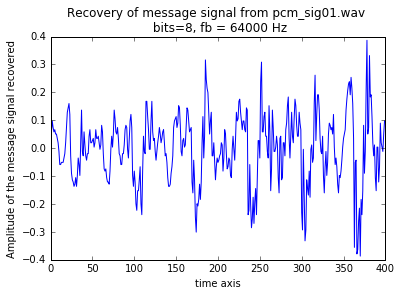

In [84]:
plot(mt[0:400])
xlabel('time axis')
ylabel('Amplitude of the message signal recovered')
title('Recovery of message signal from pcm_sig01.wav \n bits=8, fb = 64000 Hz')

In [85]:
import wavfun as wf
wf.wavwrite(mt/float(max(abs(mt))),8000,'pcm_sig01_message.wav')
# Write wav-file

 # Below is the code which will chnage the pcm_sig02.wav to to bits sequence. The bit rate taken is 64000.

In [100]:
# %load ftpam_rcvr01.py
# File: ftpam_rcvr01.py
# Script file that accepts a binary unipolar flat top PAM
# signal r(t) with bitrate fb and sampling rate fs
# as input and decodes it into a received text string.
# The PAM signal r(t) is received from a wav-file with
# sampling rate fs. First r(t) is sampled at the right DT sequence 
# sampling times, spaced tb = 1/fb apart. The result is then 
# quantized to binary (0 or 1) to form the 
# estimated received sequence dnhat which is subsequently
# converted to 8 bit ASCII text.

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("pcm_sig02.wav")

fb = 64000 
tb = 1/float(fb)

bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits

rt = list(rt)  	# changing rt into list type
comp_val = (max(rt) + min(rt))/2.0 	# taking mid value for estimation

######### getting sample of rt signal #######


######### getting sample of rt signal #######

dnhat=[]
for i in range(n):
	d_prime = rt[i*round(fs*tb):(i+1)*round(fs*tb)]
	avg = sum(d_prime) / round(fs*tb)     # averaging out the one bit window and the comapring
	if avg > 0:
		dnhat = dnhat + [1]
	else:
		dnhat = dnhat + [0]

#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array


In [101]:
mt = pcm2mt(dnhat, bits=8)

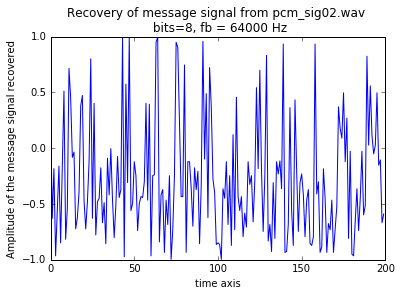

In [102]:
plot(mt[0:200])
xlabel('time axis')
ylabel('Amplitude of the message signal recovered')
title('Recovery of message signal from pcm_sig02.wav \n bits=8, fb = 64000 Hz')

In [103]:
import wavfun as wf
wf.wavwrite(0.99*mt/float(max(abs(mt))),8000,'pcm_sig02_message.wav')
# Write wav-file

# The wav file is generated and they are included in the folder.